In [1]:
import pandas as pd

df_o = pd.read_csv('Orders.csv', sep =';')
df_od = pd.read_csv('Order_details.csv', sep =';')
df_e = pd.read_excel('Employees.xlsx', sheet_name = 'Лист1')
df_p = pd.read_csv('Products.csv', sep =';')
df_o = pd.read_csv('Orders.csv', sep =';')
df_c = pd.read_csv('Customers.csv', sep =';')

df_od['Discount_fact'] = df_od['UnitPrice'] * df_od['Quantity'] * df_od['Discount']
df_od['Revenue'] = df_od['UnitPrice'] * df_od['Quantity'] - df_od['Discount_fact']


1. Посчитайте количество клиентов, чья должность - Owner. df_c

In [18]:
len(df_c[df_c['ContactTitle'] == 'Owner'])

17

2. Посчитайте количество заказов, оформленных позднее даты 1997-07-05. df_o

In [26]:
df_o['OrderDate'] = df_o['OrderDate'].astype('datetime64[ns]')
df_o[df_o['OrderDate'] > '1997-07-05']

3. Посчитайте количество товаров, которые находятся в диапазоне цен от 18 до 22. Товары стоимостью 18 или 22 тоже должны быть учтены. df_p

In [55]:
len(df_p[df_p['UnitPrice'].between(18.0, 22.0)])

16

4. Выведите в одной таблице заказы, которые:

- были оформлены в 1997 году;

- заказы с весом более 500.

Сколько их?

In [59]:
len(df_o[(df_o['Freight'] > 500) | (df_o['OrderDate'].dt.year == 1997)])

416

5. Посчитайте количество клиентов, чьи имена начинаются на латинскую букву A. Сколько таких клиентов? df_c

In [61]:
len(df_c[df_c['ContactName'].str.startswith('A')])

10

6. Выведите клиентов, чьи номера телефонов содержат 5555 (четыре символа 5 подряд). Четыре пятерки подряд могут быть в начале номера, в середине или в конце. Сколько таких клиентов?

In [66]:
len(df_c[df_c['Phone'].str.contains('5{4}') == True])

2

7. Выведите заказы, которые были оформлены в 1997 году. Затем отсортируйте заказы по весу в порядке убывания. 

In [73]:
df_o['OrderDate'] = df_o['OrderDate'].astype('datetime64[ns]')

df_o[df_o.OrderDate.between('1997-01-01', '1997-12-31')].sort_values('Freight',ascending = False )

,OrderID,CustomerID,EmployeeID,OrderDate,RequiredDate,ShippedDate,Freight
292,10540,QUICK,3,1997-05-19,1997-06-16 00:00:00.000,1997-06-13 00:00:00.000,1007.64
443,10691,QUICK,2,1997-10-03,1997-11-14 00:00:00.000,1997-10-22 00:00:00.000,810.05
266,10514,ERNSH,3,1997-04-22,1997-05-20 00:00:00.000,1997-05-16 00:00:00.000,789.95
231,10479,RATTC,3,1997-03-19,1997-04-16 00:00:00.000,1997-03-21 00:00:00.000,708.95
364,10612,SAVEA,1,1997-07-28,1997-08-25 00:00:00.000,1997-08-01 00:00:00.000,544.08
...,...,...,...,...,...,...,...
451,10699,MORGK,3,1997-10-09,1997-11-06 00:00:00.000,1997-10-13 00:00:00.000,0.58
338,10586,REGGC,9,1997-07-02,1997-07-30 00:00:00.000,1997-07-09 00:00:00.000,0.48
167,10415,HUNGC,3,1997-01-15,1997-02-12 00:00:00.000,1997-01-24 00:00:00.000,0.20
261,10509,BLAUS,4,1997-04-17,1997-05-15 00:00:00.000,1997-04-29 00:00:00.000,0.15


8. Выведите заказы, совершенные в 1997 году. Отсортируйте заказы в порядке возрастания по двум столбцам: ID клиента и вес заказа. Укажите минимальный вес заказа, который совершил клиент с ID ANTON

In [79]:
df_o2 = df_o[(df_o.OrderDate.between('1997-01-01', '1997-12-31'))].sort_values(['CustomerID','Freight'])
df_o2[df_o2['CustomerID'] == 'ANTON']

,OrderID,CustomerID,EmployeeID,OrderDate,RequiredDate,ShippedDate,Freight
429,10677,ANTON,1,1997-09-22,1997-10-20 00:00:00.000,1997-09-26 00:00:00.000,4.03
287,10535,ANTON,4,1997-05-13,1997-06-10 00:00:00.000,1997-05-21 00:00:00.000,15.64
434,10682,ANTON,3,1997-09-25,1997-10-23 00:00:00.000,1997-10-01 00:00:00.000,36.13
259,10507,ANTON,7,1997-04-15,1997-05-13 00:00:00.000,1997-04-22 00:00:00.000,47.45
325,10573,ANTON,7,1997-06-19,1997-07-17 00:00:00.000,1997-06-20 00:00:00.000,84.84


9. Посчитайте количество клиентов, у которых должность Owner или Sales Representative.

In [83]:
df_c[(df_c['ContactTitle'] == 'Owner') | (df_c['ContactTitle'] == 'Sales Representative')].count()

CustomerID      34
ContactName     34
ContactTitle    34
Phone           34
Address         34
dtype: int64

10. Посчитайте суммарный вес заказов, которые были совершены 26 февраля 1998 года.

In [103]:
df_o['OrderDate']= df_o['OrderDate'].astype('datetime64[ns]')
df_o[df_o['OrderDate'] =='1998-02-26'].Freight.sum()

776.27

11. Посчитайте в разрезе должностей количество клиентов.

In [105]:
df_c.groupby('ContactTitle').CustomerID.count()

ContactTitle
Accounting Manager                10
Assistant Sales Agent              2
Assistant Sales Representative     1
Marketing Assistant                6
Marketing Manager                 12
Order Administrator                2
Owner                             17
Owner/Marketing Assistant          1
Sales Agent                        5
Sales Associate                    7
Sales Manager                     11
Sales Representative              17
Name: CustomerID, dtype: int64

12.  Какое максимальное количество заказов оформил один сотрудник одному клиенту?

In [14]:
df_o['OrderDate']= df_o['OrderDate'].astype('datetime64[ns]')
df_o.groupby(['EmployeeID', 'CustomerID'],as_index=False).count().sort_values('OrderID', ascending=False)

,EmployeeID,CustomerID,OrderID,OrderDate,RequiredDate,ShippedDate,Freight
128,3,BERGS,6,6,6,6,6
103,2,QUICK,6,6,6,6,6
50,1,SAVEA,6,6,6,6,6
391,8,FOLKO,6,6,6,6,6
150,3,HUNGO,5,5,5,5,5
...,...,...,...,...,...,...,...
188,4,ANATR,1,1,1,1,1
186,3,WILMK,1,1,1,1,1
183,3,WARTH,1,1,1,1,1
182,3,VINET,1,1,1,1,1


13. У скольких заказов фактическая скидка составила более 2000?

In [32]:
df_od2 = df_od.groupby('OrderID').agg({'Discount_fact':'sum', 'Revenue':'sum'}).reset_index()
df_od2[df_od2['Discount_fact']>2000].OrderID.count()


5

14.Как зовут сотрудника, который оформил больше всего заказов за все время?

In [15]:
df_o_e = df_e.merge(df_o)
df_o_e.groupby(['EmployeeID', 'FirstName', 'LastName'], as_index=False).count().sort_values('OrderID', ascending=False)

,EmployeeID,FirstName,LastName,Title,TitleOfCourtesy,BirthDate,HireDate,Address,HomePhone,OrderID,CustomerID,OrderDate,RequiredDate,ShippedDate,Freight
3,4,Margaret,Peacock,156,156,156,156,156,156,156,156,156,156,151,156
2,3,Janet,Leverling,127,127,127,127,127,127,127,127,127,127,127,127
0,1,Nancy,Davolio,123,123,123,123,123,123,123,123,123,123,120,123
7,8,Laura,Callahan,104,104,104,104,104,104,104,104,104,104,100,104
1,2,Andrew,Fuller,96,96,96,96,96,96,96,96,96,96,93,96
6,7,Robert,King,72,72,72,72,72,72,72,72,72,72,69,72
5,6,Michael,Suyama,67,67,67,67,67,67,67,67,67,67,65,67
8,9,Anne,Dodsworth,43,43,43,43,43,43,43,43,43,43,42,43
4,5,Steven,Buchanan,42,42,42,42,42,42,42,42,42,42,42,42


15. Как зовут клиента, который принес самую высокую чистую выручку за все время?

In [25]:
df_c_o_od = df_c.merge(df_o).merge(df_od)
df_c_o_od.groupby('ContactName').agg({'Revenue':'sum'}).sort_values('Revenue', ascending=False)

,Revenue
ContactName,
Horst Kloss,110277.3050
Roland Mendel,104874.9785
Jose Pavarotti,104361.9500
Paula Wilson,51097.8005
Patricia McKenna,49979.9050
...,...
Eduardo Saavedra,836.7000
Simon Crowther,649.0000
Yoshi Tannamuri,522.5000


16. Какая категория товаров принесла самую высокую чистую выручку?

In [7]:
df_od_p = df_od.merge(df_p, left_on = 'ProductID', right_on = 'ProductID')
df_od_p.groupby('CategoryName').agg({'Revenue':'sum'}).sort_values('Revenue', ascending=False)

,Revenue
CategoryName,
Beverages,267868.1800
Dairy Products,234507.2850
Confections,167357.2250
Meat/Poultry,163022.3595
Seafood,131261.7375
Condiments,106047.0850
Produce,99984.5800
Grains/Cereals,95744.5875


17. Сколько человек состоят в должности Sales Representative?

In [12]:
a = pd.DataFrame({'Title':df_e['Title']})

b = pd.DataFrame({'Title':df_c['ContactTitle']})

c = pd.concat([a,b])

c.value_counts().reset_index()

,Title,count
0,Sales Representative,23
1,Owner,17
2,Marketing Manager,12
3,Sales Manager,12
4,Accounting Manager,10
5,Sales Associate,7
6,Marketing Assistant,6
7,Sales Agent,5
8,Assistant Sales Agent,2
9,Order Administrator,2


18. В каком месяце было совершено рекордное количество заказов? 

In [22]:
df_o['OrderDate']= df_o['OrderDate'].astype('datetime64[ns]')
df_o['Month'] = df_o['OrderDate'].dt.month
df_o['Year'] = df_o['OrderDate'].dt.year

df_o.groupby(['Month', 'Year']).count()

19. Сколько заказов было сделано на 43 неделе 1996 года?

In [26]:
df_o['OrderDate']= df_o['OrderDate'].astype('datetime64[ns]')
df_o['Week'] = df_o['OrderDate'].dt.isocalendar().week

df_o.groupby(['Month', 'Year', 'Week'], as_index=False).OrderID.count()
df_o[(df_o['Week'] == 43) & (df_o['Year'] == 1996)].OrderID.count()

20. Посчитайте рекордную чистую выручку, которую сделал один сотрудник в месяц?


In [ ]:
df_od_o = df_od.merge(df_o)
df_od_o.groupby(['EmployeeID', 'Month', 'Year']).agg({'Revenue': 'sum'}).sort_values('Revenue', ascending=False)


21. Сколько заказов было оформлено в 1 квартале 1998 года?

In [55]:
df_o['Quarter'] = df_o['OrderDate'].dt.quarter

df_o_pivot = df_o.pivot_table(index='Year', columns='Quarter', values='OrderID', aggfunc='count', fill_value=0)

22. На сколько представители одного пола оформили больше заказов, чем представители другого пола? 

In [58]:
df_sex = pd.DataFrame({'TitleOfCourtesy':['Ms.', 'Dr.', 'Mrs.', 'Mr.'],'Sex':['female','male','female','male']})
a = df_e.merge(df_sex).merge(df_o[['OrderID','EmployeeID']])
df_sex_OrderID = a[['Sex','OrderID']]
b = df_sex_OrderID.groupby('Sex').OrderID.count().reset_index()
b['OrderID'].max() - b['OrderID'].min()

276

23. Посчитайте для каждого заказа чистую выручку. Разбейте столбец с чистой выручкой на 5 бинов.  Далее в разрезе бинов посчитайте количество заказов. 

In [93]:
df_o['OrderDate'] = df_o['OrderDate'].astype('datetime64[ns]')

df_od = df_od.groupby('OrderID').Revenue.sum().reset_index()

df_od['bins'] = pd.qcut(df_od['Revenue'], 5)

df_od.groupby('bins').OrderID.count().reset_index()

,bins,OrderID
0,"(12.499, 365.432]",166
1,"(365.432, 721.86]",166
2,"(721.86, 1335.78]",166
3,"(1335.78, 2122.976]",166
4,"(2122.976, 16387.5]",166


24. Сотрудник с каким ID оформил больше всего заказов за все время?

<Axes: >

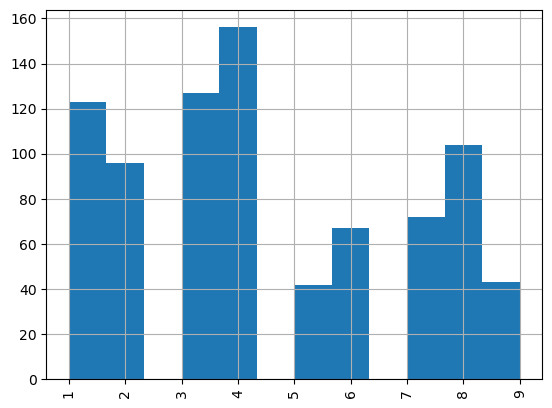

In [94]:
df_o['EmployeeID'].hist(xrot = 'vertical', bins = 12)

25. Сравнение выручки в 1997 и 1998 по неделям.

<Axes: xlabel='Week'>

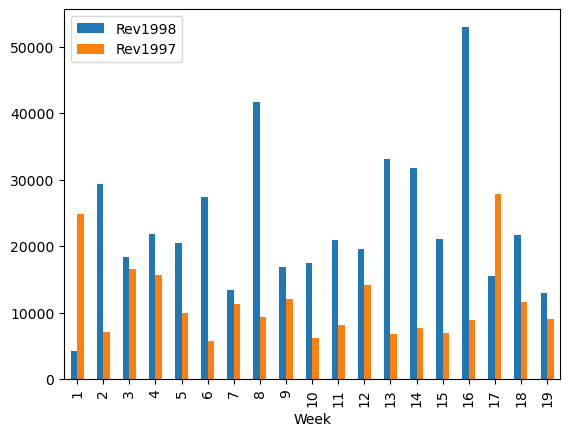

In [131]:
rev1997 = df_od_o[df_od_o['Year'] == 1997].groupby('Week').Revenue.sum().reset_index()
rev1998 = df_od_o[df_od_o['Year'] == 1998].groupby('Week').Revenue.sum().reset_index()

rev1997 = rev1997.rename(columns = {'Revenue':'Rev1997'})
rev1998 = rev1998.rename(columns = {'Revenue':'Rev1998'})

result = rev1998.merge(rev1997)

result.plot(kind= 'bar', x = 'Week')

26. Для каждого клиента CustomerID посчитайте количество совершенных заказов.

<Axes: >

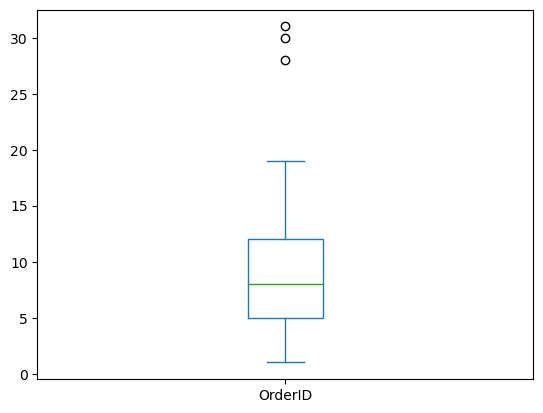

In [6]:
df_o.groupby('CustomerID').OrderID.count().plot(kind='box')